<a href="https://colab.research.google.com/github/DeepakKumarSingh003/-Demand-Prediction-for-Public-Transport-Movement-in-Nirobi/blob/main/demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [2]:
#Mount Google drive to fetch Dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
#importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
#store dataset as df
df = pd.read_csv("/content/drive/MyDrive/Alma better Projects/Regression ML-Demand prediction/train_revised.csv")

#Overview Of  Our DataSet.

In [5]:
#Rows and columns count
df.shape

(51645, 10)

In [6]:
#Top 5 and Bottom 5 Rows
display(df.head(),  df.tail())

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


In [7]:
#Basic information from features
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [8]:
#Function for detail information about data frame.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
#Insert columns in place of index  
  info = pd.DataFrame(index=DataFrame.columns)
#Inser Data type of columns as dtype into  Dataframe in first place   
  info['dtype'] = DataFrame.dtypes
#Inser Unique elements in each columns into  Dataframe at second place    
  info['Unique'] = DataFrame.nunique()
#Inser NUll elements in each columns into  Dataframe at third place  
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
#Inser Not NUll elements in each columns into  Dataframe at fourth place  
  info['Num_nonNullValues'] = DataFrame.count()
  return info

In [9]:
Detailed_info(df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues
ride_id,int64,6249,0,51645
seat_number,object,61,0,51645
payment_method,object,2,0,51645
payment_receipt,object,51645,0,51645
travel_date,object,149,0,51645
travel_time,object,78,0,51645
travel_from,object,17,0,51645
travel_to,object,1,0,51645
car_type,object,2,0,51645
max_capacity,int64,2,0,51645


**Notes**
* There are no nulls in our data set.
* Most of the feature are object type.
* Continuous features are very less.

#Generating Target Variable & Feature Selection as per Problem Statement.

**Problem Statement**

We have to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride.
* i.e. for a specific route on a specific date and time.
* We have to predict the total tickets to be booked for a journey from different 17 location toward Nirobi.

**Feature Description:**
* ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* seat_number: seat assigned to ticket
* payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* payment_receipt: unique id number for ticket purchased from Mobiticket
* travel_date: date of ride departure. (MM/DD/YYYY)
* travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* travel_from: town from which ride originated
* travel_to: destination of ride. All rides are to Nairobi.
* car_type: vehicle type (shuttle or bus)
* max_capacity: number of seats on the vehicle

**Note**
* Using above feature we have to Extract Traget variable "No. of Tickets".
* we have to check which of the above features are relevant for our Target variable to predict.
* keep the Relevant features and discard others. 
 

**Extracting Target Variable**
* As the we have unique vehicle ids for routes we will count the total unique ride_id's which is Total Bookings of a particular day at particular route and specific time.

In [10]:
#Count the id,s and map them with given id number.
ride_id_dict = {} 
for ride_id in df["ride_id"]:
    if not ride_id in ride_id_dict:
        ride_id_dict[ride_id] = 1
    else:
        ride_id_dict[ride_id] += 1

In [11]:
#length of dictionary and length of ride_id unique should be same
display(len(ride_id_dict),len(df.ride_id.unique()))

6249

6249

In [12]:
#drop all the duplicates as they are 
df.drop_duplicates(subset="ride_id",inplace=True)
df.reset_index(drop= True, inplace=True)

In [13]:
len(df)

6249

In [14]:
for i in range(len(df)):
    ride_id = df.loc[i]["ride_id"]
    df.at[i,"Bookings"] = ride_id_dict[ride_id]

In [15]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,Bookings
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1.0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1.0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1.0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5.0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31.0


**Basic Feature Selection**


In [16]:
print(f"Total values counts of ride_id:-{df.ride_id.value_counts().sum()}")
print(f"Total values counts of payment_receipt:-{df.payment_receipt.value_counts().sum()}")


Total values counts of ride_id:-6249
Total values counts of payment_receipt:-6249


In [17]:
print(df.payment_method.value_counts())
print("\n")
print(df.travel_to.value_counts())

Mpesa    6211
Cash       38
Name: payment_method, dtype: int64


Nairobi    6249
Name: travel_to, dtype: int64


In [18]:
Dummy=pd.get_dummies(df["car_type"])

In [19]:
check=pd.concat([Dummy,df["max_capacity"]],axis=1)

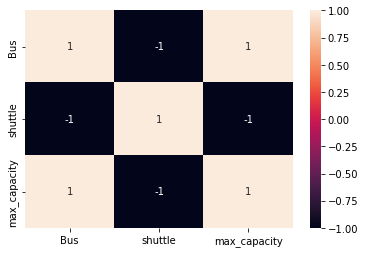

In [20]:
sns.heatmap(check.corr(),annot=True)
plt.show()

In [21]:
df.drop(df[["travel_to","ride_id","payment_receipt","car_type","seat_number","payment_method"]],axis=1,inplace=True)

In [22]:
#drop irrelevant features
# df.drop(['ride_id','seat_number','payment_method','payment_receipt','travel_to'], axis=1,inplace=True)

#Feature Engineering

In [23]:
df.head()


,travel_date,travel_time,travel_from,max_capacity,Bookings
0,17-10-17,7:15,Migori,49,1.0
1,19-11-17,7:12,Migori,49,1.0
2,26-11-17,7:05,Keroka,49,1.0
3,27-11-17,7:10,Homa Bay,49,5.0
4,27-11-17,7:12,Migori,49,31.0


**Extracting years ,month ,days ,weeks,day_ofweek**

In [24]:
#Extracting features from Date
df['year'] = pd.DatetimeIndex(df['travel_date']).year
df['month'] = pd.DatetimeIndex(df['travel_date']).month
df['day'] = pd.DatetimeIndex(df['travel_date']).day
df['week'] = pd.DatetimeIndex(df['travel_date']).week
df["day_ofweek"] = pd.DatetimeIndex(df["travel_date"]).dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [25]:
print(df.shape)
df.sample(5)

(6249, 10)


,travel_date,travel_time,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek
258,29-11-17,7:08,Migori,49,1.0,2017,11,29,48,2
5421,28-03-18,7:10,Homa Bay,49,1.0,2018,3,28,13,2
1000,02-03-18,6:20,Kisii,11,1.0,2018,2,3,5,5
3671,17-02-18,19:07,Sirare,49,31.0,2018,2,17,7,5
1405,18-02-18,8:40,Kisii,11,7.0,2018,2,18,7,6


In [26]:
#drop travel date 
df.drop(["travel_date"],axis=1, inplace=True)

**Time of Travel**
* converting time into minutes formate.
* Drop "travel_time" after conversion.

In [27]:
#express travel time in minutes
df["Time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
df.drop(["travel_time"],axis=1,inplace=True)


In [28]:
def calculate_time_period(travel_time_In_minutes):
    time_period = travel_time_In_minutes / 60
    return time_period

df['Boarding_time'] = np.ceil(df.Time.apply(calculate_time_period))
df.drop(["Time"],axis=1,inplace=True)

In [29]:
df.head(10)

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_time
0,Migori,49,1.0,2017,10,17,42,1,8.0
1,Migori,49,1.0,2017,11,19,46,6,8.0
2,Keroka,49,1.0,2017,11,26,47,6,8.0
3,Homa Bay,49,5.0,2017,11,27,48,0,8.0
4,Migori,49,31.0,2017,11,27,48,0,8.0
5,Homa Bay,49,26.0,2017,11,27,48,0,8.0
6,Kisii,11,1.0,2018,4,20,16,4,6.0
7,Kisii,11,1.0,2018,4,20,16,4,10.0
8,Kisii,49,2.0,2018,4,20,16,4,8.0
9,Kisii,11,1.0,2018,4,20,16,4,6.0


In [30]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_time
0,Migori,49,1.0,2017,10,17,42,1,8.0
1,Migori,49,1.0,2017,11,19,46,6,8.0
2,Keroka,49,1.0,2017,11,26,47,6,8.0
3,Homa Bay,49,5.0,2017,11,27,48,0,8.0
4,Migori,49,31.0,2017,11,27,48,0,8.0


In [31]:
bins = [0, 6, 12, 18, 24]
names = ['mid_night','morning', 'Afternoon', 'Evening']
df['Boarding_period'] = pd.cut(df.Boarding_time, bins, labels=names)
df.drop(["Boarding_time"],axis=1,inplace=True)

In [32]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_period
0,Migori,49,1.0,2017,10,17,42,1,morning
1,Migori,49,1.0,2017,11,19,46,6,morning
2,Keroka,49,1.0,2017,11,26,47,6,morning
3,Homa Bay,49,5.0,2017,11,27,48,0,morning
4,Migori,49,31.0,2017,11,27,48,0,morning


# Outliers

**Target Variable**

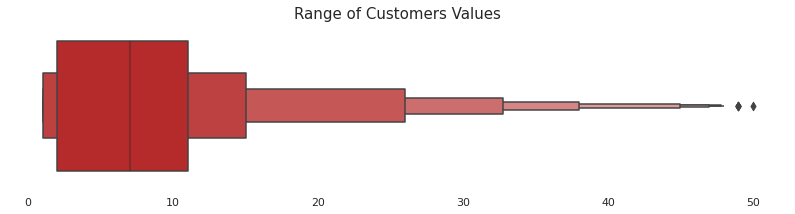

In [33]:
sns.set_theme(rc={'figure.figsize': (14,3)},style='whitegrid')
sns.boxenplot(x=df['Bookings'],color='#CC1313')
plt.grid(False)
plt.xlabel('')
plt.title('Range of Customers Values',size=15)
ax = plt.gca()
for spine in ax.spines.values():
   spine.set_visible(False)

In [34]:
def out_iqr(df , column):
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    perc=(df1.shape[0]+ df2.shape[0]/len(df[column]))
    return print('Total number of outliers are',df1.shape[0]+ df2.shape[0],"In percentage",((df1.shape[0]+ df2.shape[0])*100/len(df[column])))
          

In [35]:
out_iqr(df,"Bookings")

The IQR is 9.0
The lower bound value is -11.5
The upper bound value is 24.5
Total number of outliers are 420 In percentage 6.72107537205953


In [36]:
df[df.Bookings>=25]

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_period
4,Migori,49,31.0,2017,11,27,48,0,morning
5,Homa Bay,49,26.0,2017,11,27,48,0,morning
406,Homa Bay,49,25.0,2017,4,12,15,2,morning
441,Kisii,49,31.0,2018,12,3,49,0,Evening
453,Migori,49,25.0,2017,5,12,19,4,morning
...,...,...,...,...,...,...,...,...,...
6218,Sirare,49,39.0,2018,4,20,16,4,Evening
6220,Homa Bay,49,30.0,2018,4,20,16,4,morning
6221,Migori,49,40.0,2018,4,20,16,4,morning
6228,Awendo,49,27.0,2018,4,20,16,4,morning


In [37]:
df["Bookings"].skew()

2.055324253303991

**TRANSFORMING VALUES:**
1. Scalling
2. Log transformation
3. Cube Root Normalization
4. Box-Cox transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


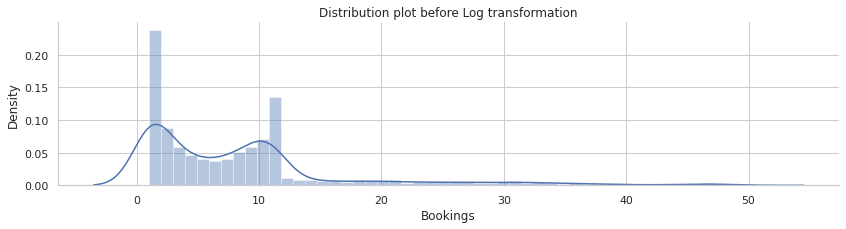

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


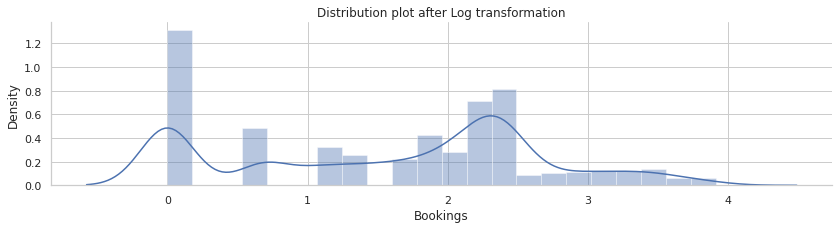

In [38]:
#log trnsformation
sns.distplot(df['Bookings'])
plt.title("Distribution plot before Log transformation")
sns.despine()
plt.show()
# df1['log_Bookings'] = np.log(df['Bookings'])
sns.distplot(np.log(df['Bookings']))
plt.title("Distribution plot after Log transformation")
sns.despine()
plt.show()

**Quantile-based Capping**

In [39]:
# df["Tickets"].quantile(0.90)

In [40]:
# df["Bookings"] = np.where(df["Bookings"] >=25, 19,df['Bookings'])
df["Bookings"]=np.log(df['Bookings'])
df.Bookings.skew()

-0.13768726052304076

In [41]:
df['Bookings']=df["Bookings"].astype(int)

In [42]:
df.describe()

,max_capacity,Bookings,year,month,day,week,day_ofweek
count,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000,6249.000000
mean,30.392223,1.231237,2017.737878,5.761402,13.832133,22.979677,2.913906
std,18.997471,0.997184,0.439824,4.076164,9.301234,17.415602,1.958013
min,11.000000,0.000000,2017.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,0.000000,2017.000000,2.000000,3.000000,8.000000,1.000000
50%,49.000000,1.000000,2018.000000,4.000000,14.000000,16.000000,3.000000
75%,49.000000,2.000000,2018.000000,10.000000,21.000000,40.000000,5.000000
max,49.000000,3.000000,2018.000000,12.000000,31.000000,52.000000,6.000000


**Boarding Time**

#EDA

**travel_from**

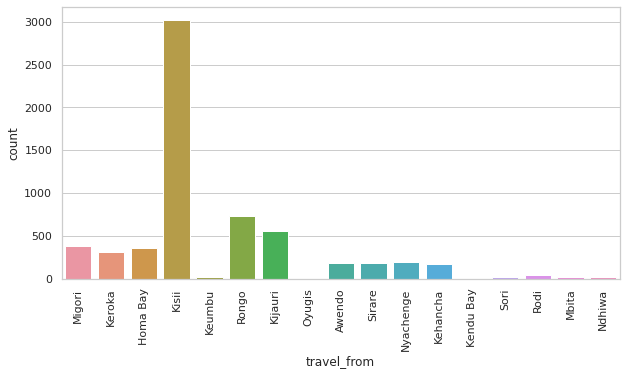

In [43]:

plt.figure(figsize=(10,5))
sns.countplot(x="travel_from",data=df)
plt.xticks(rotation=90)
plt.show()


**Observatio**
* In the dataset Majority of Travelling is between Kissi and Nairibi.
* Hence it could be that we have less data from other boarding station or we can Consider kissi as our major predictor.

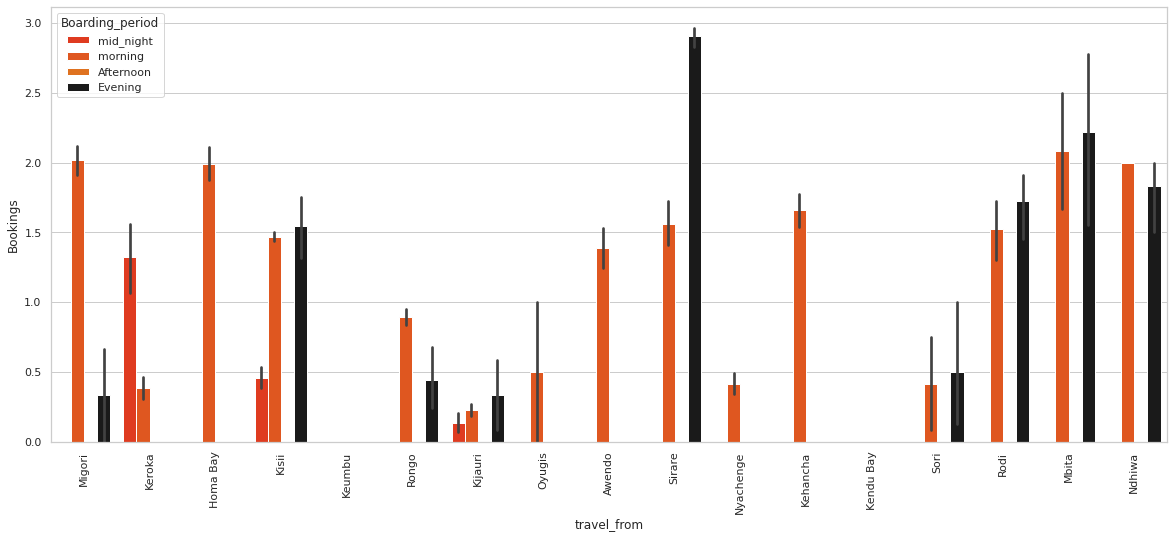

In [44]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'travel_from',y = 'Bookings',hue="Boarding_period",data = df,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

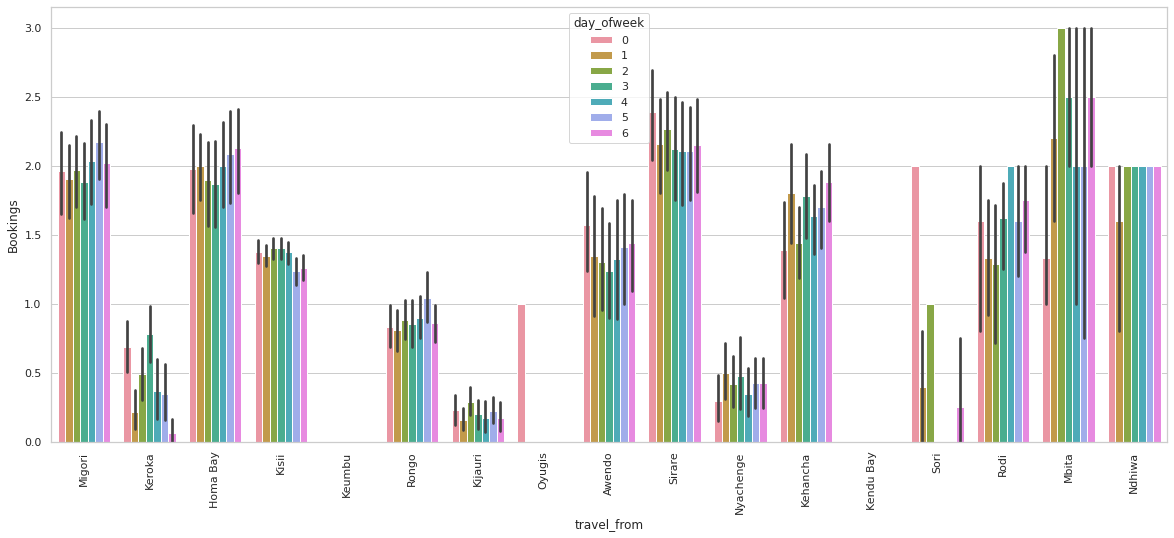

In [45]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'travel_from',y = 'Bookings',hue="day_ofweek",data = df)
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**observatio:-**
* Major travelling happend during Afternoon and Evening. 

In [46]:
##

**year**

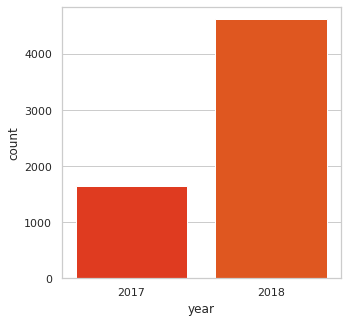

In [47]:
plt.figure(figsize=(5,5))
sns.countplot(x="year", data=df)
plt.show()

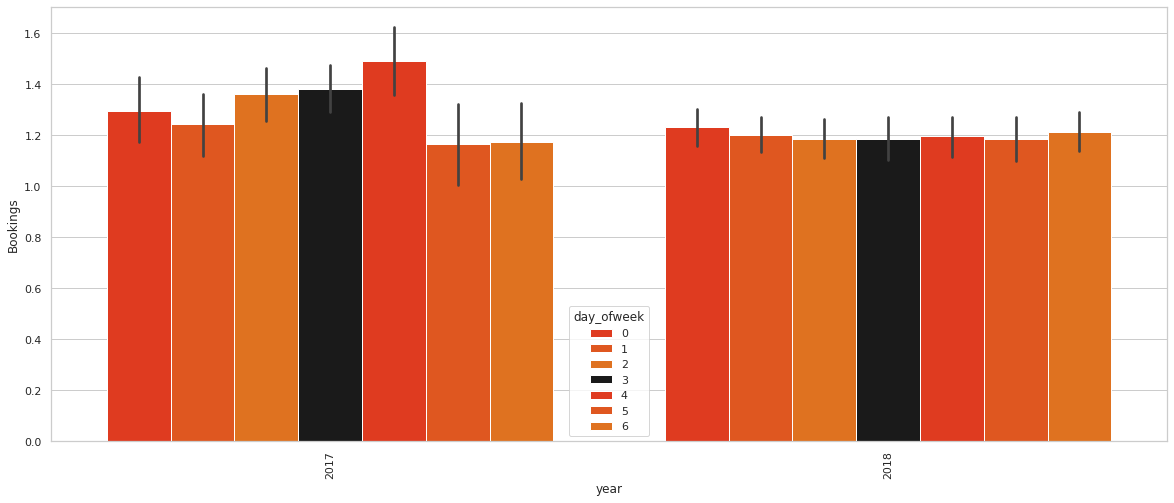

In [48]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'year',y = 'Bookings',hue="day_ofweek",data = df,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Observation**
* although we have less data for year 2017. still the travlling patter show approx same for both which shows there were more rides during 2017.
* there is no such pattern which indicate trend of travelling during weekends or during weekdays. 

**Days**

In [49]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_period
0,Migori,49,0,2017,10,17,42,1,morning
1,Migori,49,0,2017,11,19,46,6,morning
2,Keroka,49,0,2017,11,26,47,6,morning
3,Homa Bay,49,1,2017,11,27,48,0,morning
4,Migori,49,3,2017,11,27,48,0,morning


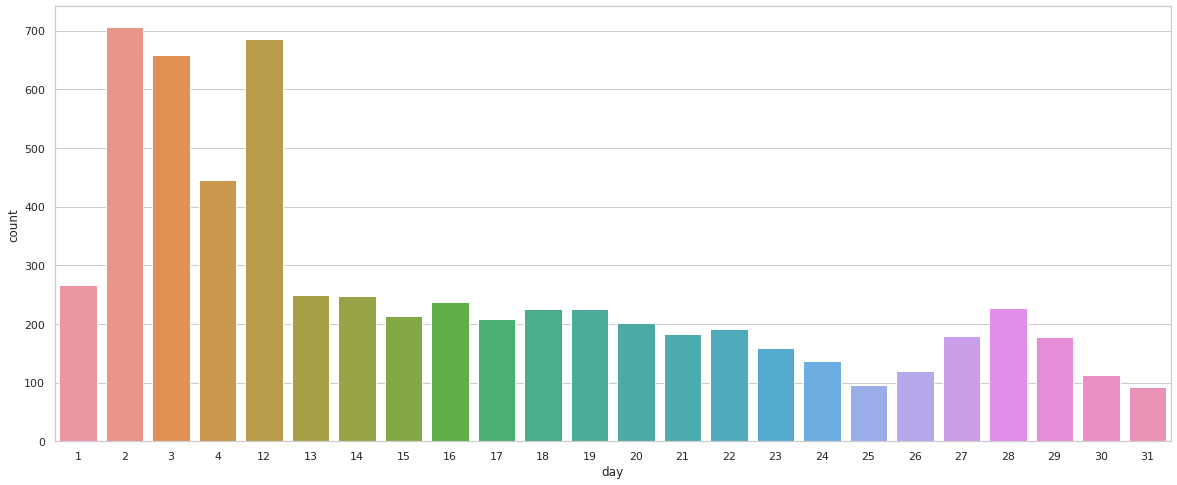

In [50]:
sns.countplot(x="day", data=df)
plt.show()

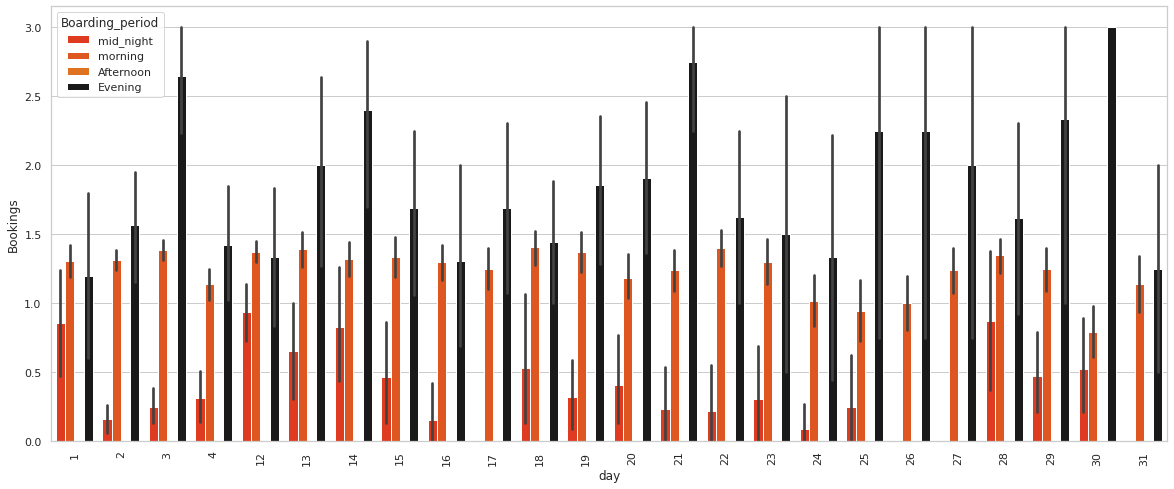

In [51]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'day',y = 'Bookings',hue="Boarding_period",data = df,palette=["C0", "C1", "C2", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

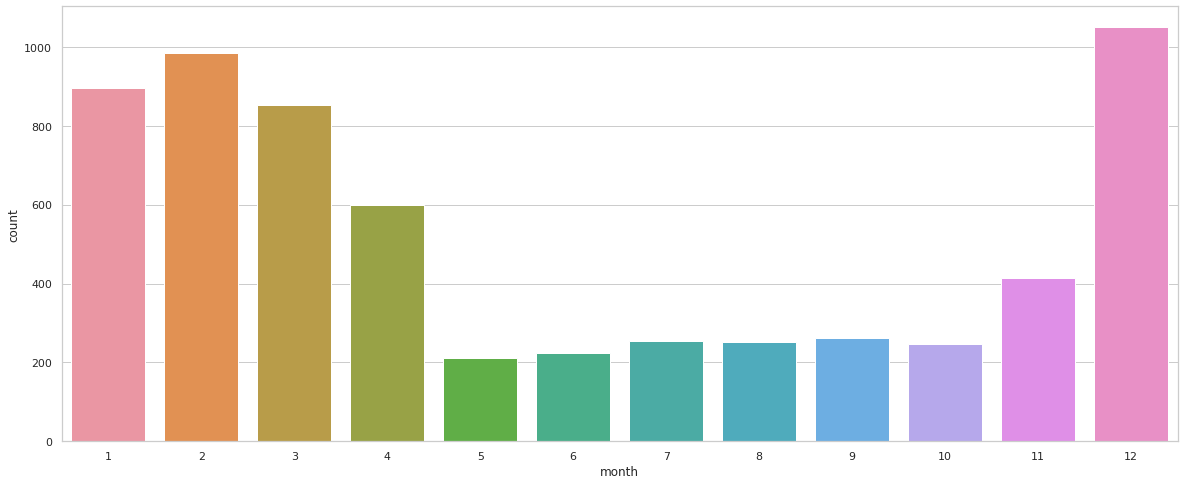

In [52]:
sns.countplot(x="month", data=df)
plt.show()

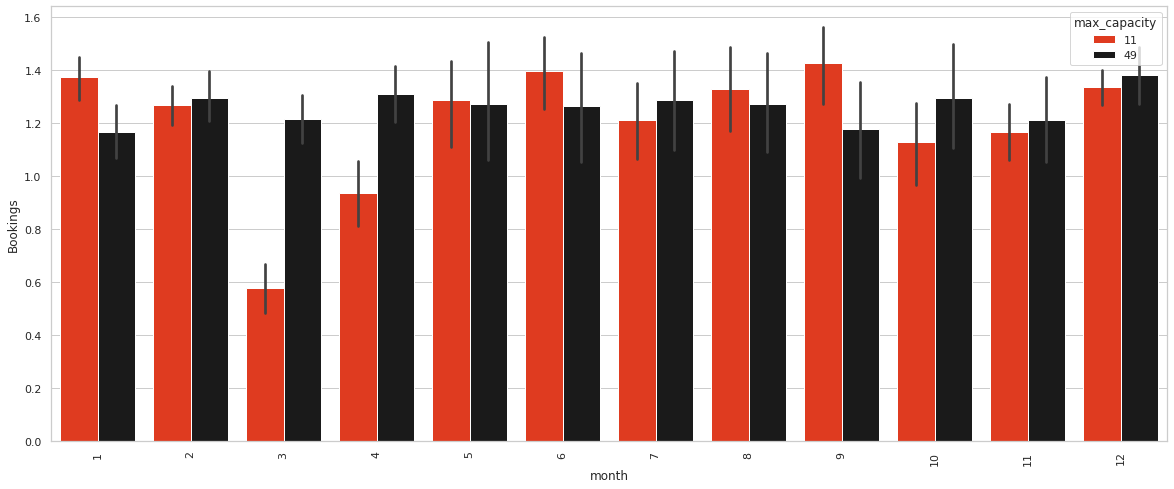

In [53]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (20,8)},style='whitegrid')
sns.barplot(x = 'month',y = 'Bookings',hue="max_capacity",data = df,palette=["C0", "k"])
plt.xticks(rotation=90) 
# Show the plot
plt.show()

**Observation**
* Higher Travelling patter during December can back by festivals(christmas).
* There is no such favorite vehicle type for ride.

In [54]:
df.columns

Index(['travel_from', 'max_capacity', 'Bookings', 'year', 'month', 'day',
       'week', 'day_ofweek', 'Boarding_period'],
      dtype='object')

**Data set Distribution**

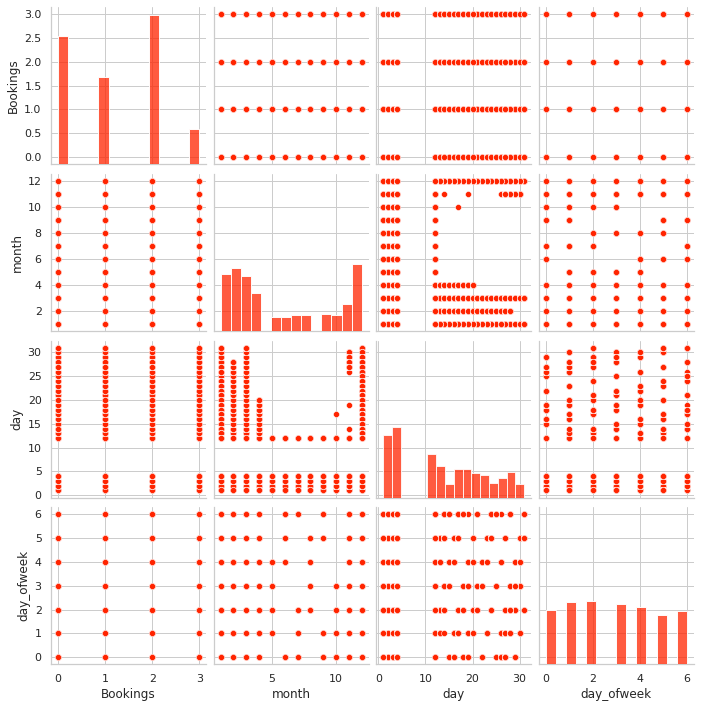

In [55]:

# visualize the relationship between the features and the response using scatterplots
Plot=df[["Bookings","Boarding_period",'travel_from', 'month', 'day',
       'day_ofweek']]
sns.pairplot(Plot)
plt.show()

In [56]:
df.columns

Index(['travel_from', 'max_capacity', 'Bookings', 'year', 'month', 'day',
       'week', 'day_ofweek', 'Boarding_period'],
      dtype='object')

In [ ]:
# df= pd.get_dummies(df, columns=["car_type","periods","travel_from"],drop_first=True)

#Feature Selection
We will use three methods for feature selection:

* Remove collinear features
* Remove features with greater than a threshold percentage of missing values
* Keep only the most relevant features using feature importances from a model


In [58]:
df.head()

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_period
0,Migori,49,0,2017,10,17,42,1,morning
1,Migori,49,0,2017,11,19,46,6,morning
2,Keroka,49,0,2017,11,26,47,6,morning
3,Homa Bay,49,1,2017,11,27,48,0,morning
4,Migori,49,3,2017,11,27,48,0,morning


In [59]:
df

,travel_from,max_capacity,Bookings,year,month,day,week,day_ofweek,Boarding_period
0,Migori,49,0,2017,10,17,42,1,morning
1,Migori,49,0,2017,11,19,46,6,morning
2,Keroka,49,0,2017,11,26,47,6,morning
3,Homa Bay,49,1,2017,11,27,48,0,morning
4,Migori,49,3,2017,11,27,48,0,morning
...,...,...,...,...,...,...,...,...,...
6244,Ndhiwa,49,2,2018,4,20,16,4,Evening
6245,Ndhiwa,49,2,2018,4,20,16,4,morning
6246,Rongo,49,0,2018,4,20,16,4,morning
6247,Awendo,49,0,2018,4,20,16,4,morning


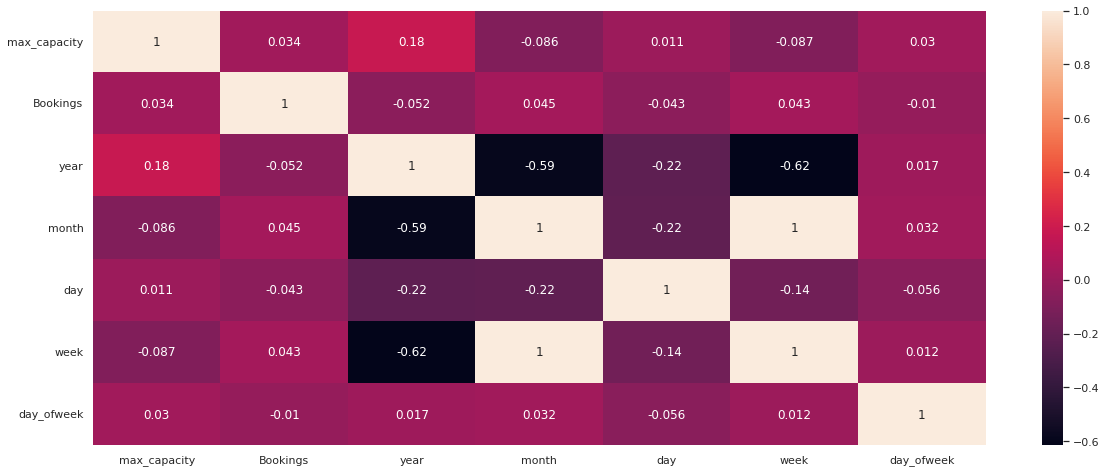

In [60]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [61]:
df.drop(["year","week"],axis=1,inplace=True)

**Threshold percentage missing values**

In [62]:
one_hot = pd.get_dummies(df[["travel_from","Boarding_period"]])

In [63]:
one_hot=pd.DataFrame(one_hot)

In [64]:
one_hot

,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,...,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,Boarding_period_mid_night,Boarding_period_morning,Boarding_period_Afternoon,Boarding_period_Evening
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6247,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [65]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=10)
clf.fit(one_hot, df["Bookings"])

RandomForestClassifier(n_estimators=10)

In [66]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

In [67]:
importances

array([0.00983617, 0.07353383, 0.02300542, 0.00105635, 0.07367073,
       0.00553433, 0.16576534, 0.19027478, 0.00690624, 0.04968169,
       0.01235296, 0.04534864, 0.00096813, 0.01828845, 0.05818337,
       0.05332619, 0.00437628, 0.10078625, 0.06534368, 0.        ,
       0.04176116])

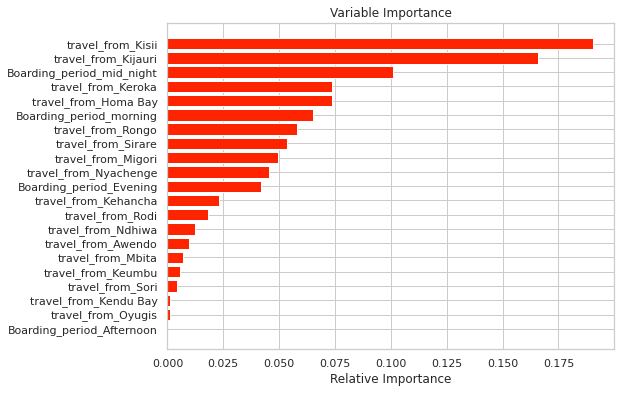

In [68]:
plt.figure(figsize=(8, 6))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

In [69]:
df.Boarding_period.value_counts()

morning      5418
mid_night     545
Evening       286
Afternoon       0
Name: Boarding_period, dtype: int64

In [70]:
one_hot.columns

Index(['travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'Boarding_period_mid_night',
       'Boarding_period_morning', 'Boarding_period_Afternoon',
       'Boarding_period_Evening'],
      dtype='object')

In [71]:
one_hot_imp=one_hot.copy()

In [72]:
one_hot_imp=one_hot[['travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
        'travel_from_Keroka','travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
        'travel_from_Rodi', 'travel_from_Rongo','travel_from_Sirare',  'Boarding_period_mid_night',
       'Boarding_period_morning','Boarding_period_Evening']]

In [73]:
one_hot_imp.head()


,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,Boarding_period_mid_night,Boarding_period_morning,Boarding_period_Evening
0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [74]:
Processed_df = pd.concat([df, one_hot_imp], axis=1)
Processed_df.drop(["travel_from","Boarding_period"],axis=1,inplace=True)

In [75]:
Processed_df.head()

,max_capacity,Bookings,month,day,day_ofweek,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,Boarding_period_mid_night,Boarding_period_morning,Boarding_period_Evening
0,49,0,10,17,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,49,0,11,19,6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,49,0,11,26,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,49,1,11,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,49,3,11,27,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


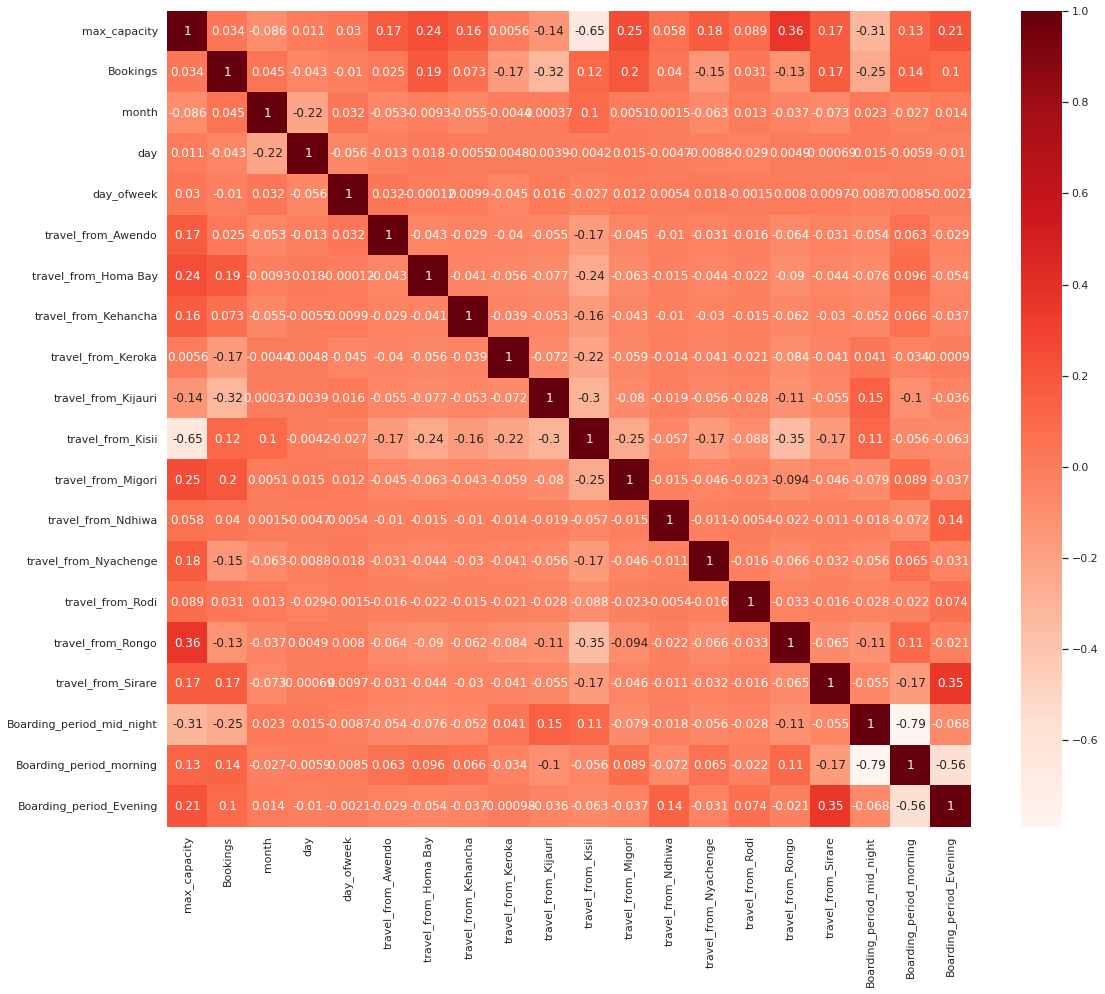

In [76]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor =Processed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Train Test Split

In [77]:
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = Processed_df['Bookings']
X = Processed_df.drop(['Bookings'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [78]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
X_train.shape, X_test.shape

((4999, 19), (1250, 19))


#Ml Models

In [80]:
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


from sklearn.model_selection import train_test_split

from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [81]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square


In [82]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)

#fit OLS model
lm_sm=sm.OLS(y_train,X_train).fit()

In [83]:
test_pred = LR_model.predict(X_test)
train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.686803125
MSE: 0.6754855987548828
RMSE: 0.8218793091171493
R2 Square 0.32684126864227747
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.6858432233321664
MSE: 0.6746064424753236
RMSE: 0.8213442898537273
R2 Square 0.31988709258115167
__________________________________


Text(0, 0.5, 'Y_predicted')

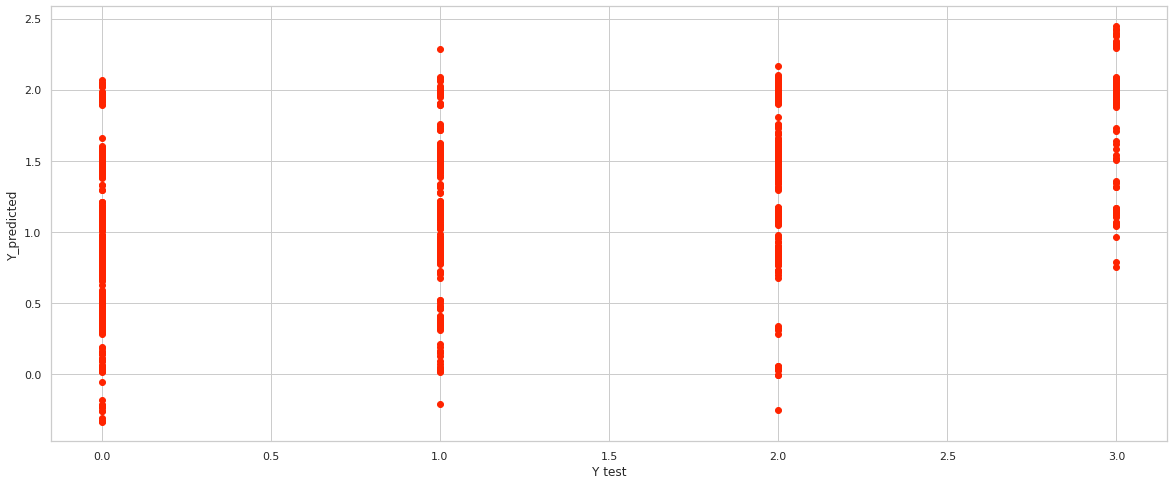

In [84]:
plt.scatter(y_test,test_pred)
plt.xlabel('Y test')
plt.ylabel('Y_predicted')

Text(0.5, 0, 'Index')

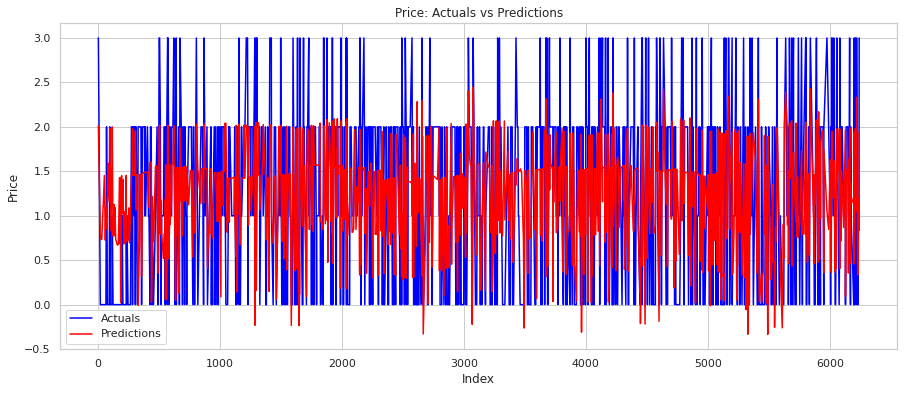

In [85]:
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='blue',ax=ax)
sns.lineplot(x=y_test.index,y=test_pred,label='Predictions',color='red',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')

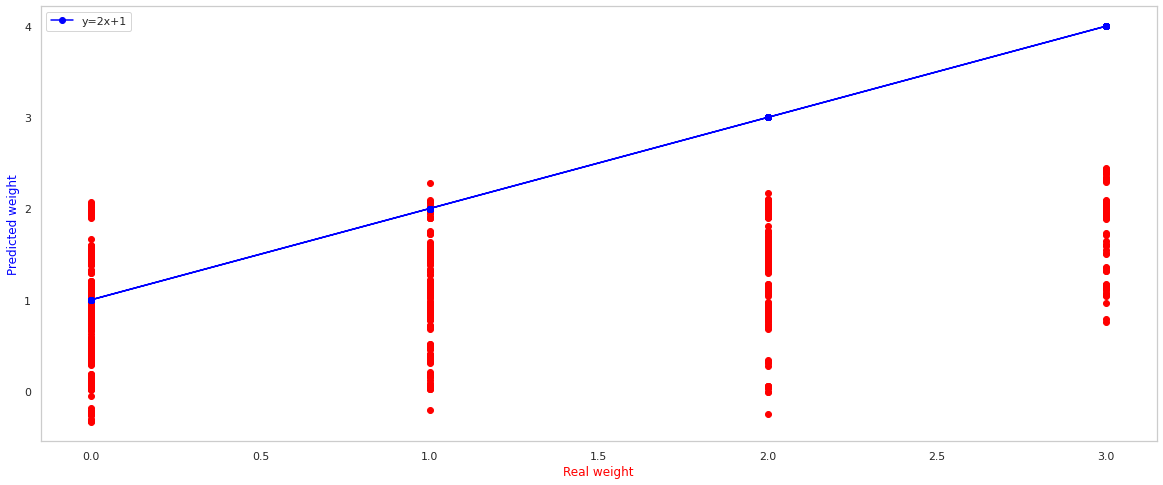

In [86]:
from matplotlib import pyplot as plt
plt.scatter(y_test, test_pred, color='red')
plt.xlabel('Real weight', color='red')
plt.ylabel('Predicted weight', color='blue')
plt.plot(y_test, y_test + 1, '-o' , linestyle='solid',label='y=2x+1', color='blue')
plt.legend(loc='upper left')
plt.grid()
plt.show()

#Linear Regression Assumptions Validation
1. Linearity of the model

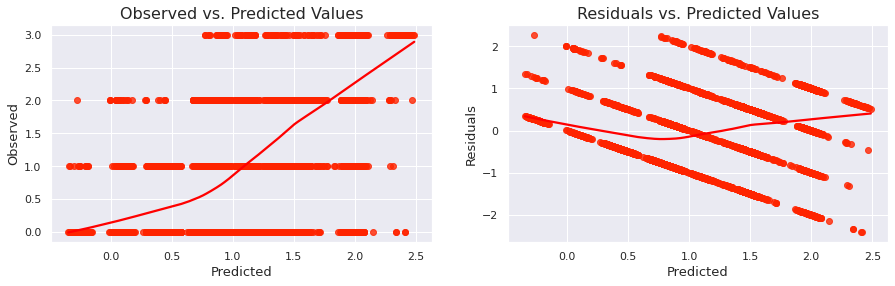

In [87]:
def linearity_test(model, y):
    
    fitted_vals = model.predict()
    residuals = model.resid
    
    sns.set_style('darkgrid')
    fig,ax=plt.subplots(1,2, figsize=(15,4))
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Observed', fontsize=13)
    
    sns.regplot(x=fitted_vals,y=residuals,lowess=True,ax=ax[1],line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Residuals', fontsize=13)
    
linearity_test(lm_sm, y_train)

2. Homoscedasticity (equal variance) of residuals

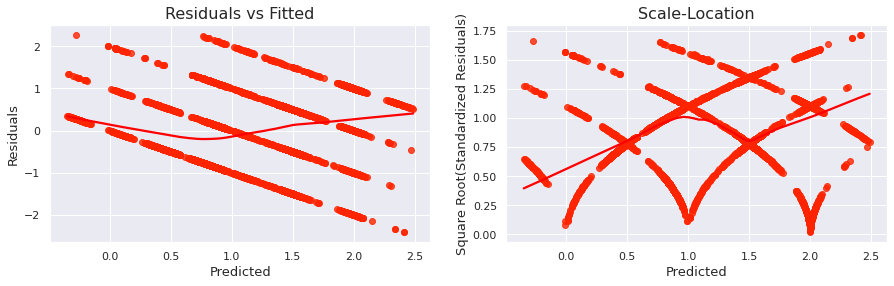

In [88]:
import statsmodels.stats.api as sms

def homoscedasticity_test(model):
    
    fitted_vals = model.predict()
    residuals = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
    
    sns.set_style('darkgrid')
    
    
    fig, ax = plt.subplots(1,2,figsize=(15,4))

    sns.regplot(x=fitted_vals, y=residuals, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set_xlabel('Predicted', fontsize=13)
    ax[0].set_ylabel('Residuals', fontsize=13)

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set_xlabel('Predicted', fontsize=13)
    ax[1].set_ylabel('Square Root(Standardized Residuals)', fontsize=13)

      
homoscedasticity_test(lm_sm)

**Residuals**
Ploting a histogram of the residuals and making sure it looks normally distributed.

Text(0.5, 1.0, 'Q-Q plot')

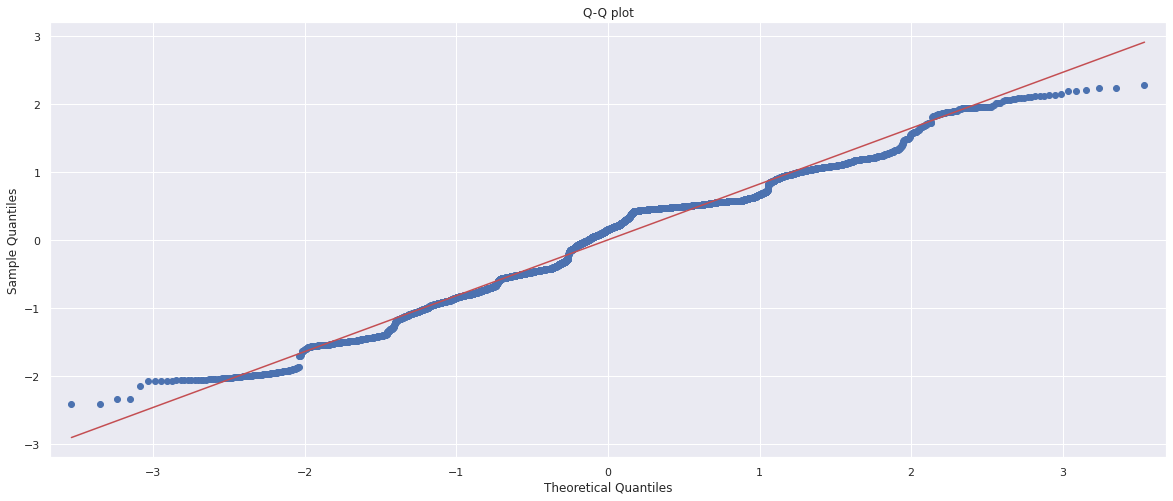

In [89]:
sm.ProbPlot(lm_sm.resid).qqplot(line='s')
plt.title('Q-Q plot')

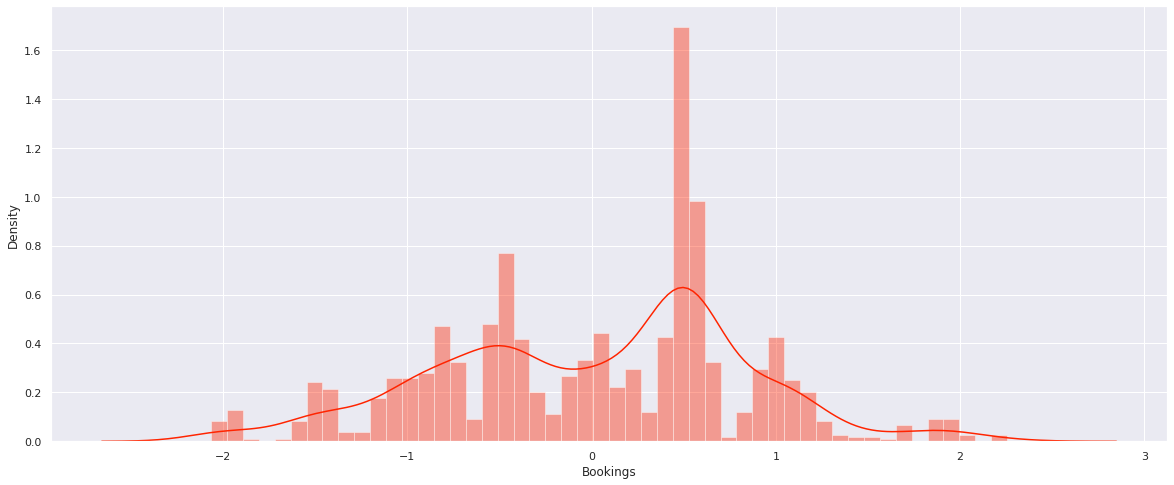

In [90]:
sns.distplot((y_test-test_pred),bins=50);

#Robust Regression

In [91]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 0.74054375
MSE: 0.947809130859375
RMSE: 0.9735548936035271
R2 Square 0.05545581834071567
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.7421593693738747
MSE: 0.9424620886091281
RMSE: 0.9708048663913506
R2 Square 0.04984507876317723
__________________________________


#SVM

In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=10, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


#Random Forest

In [92]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 0.6249105115413176
MSE: 0.7223162003572358
RMSE: 0.8498918756860991
R2 Square 0.2801719859492525
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.44208910220725756
MSE: 0.3705157731576211
RMSE: 0.6087000683075542
R2 Square 0.6264598974149439
__________________________________


**Random Forest with HyperParameter Parameter tuning.**

In [93]:
#Parameter
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [100]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf_reg,param_distributions = random_grid,
               n_iter = 100, cv = 15, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


RandomizedSearchCV(cv=15, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [101]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [99]:
randm_hyper = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf= 3, max_features = 'sqrt', max_depth= 20, bootstrap=True) 
randm_hyper.fit( X_train, y_train) 

test_pred = randm_hyper.predict(X_test)
train_pred = randm_hyper.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)



Test set evaluation:
_____________________________________
MAE: 0.6146904980745814
MSE: 0.6026201690050695
RMSE: 0.7762861386145379
R2 Square 0.3994556964563316
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.5451275276052163
MSE: 0.47193594568319
RMSE: 0.6869759425796438
R2 Square 0.5242118842560584
__________________________________


In [ ]:
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(train_pred,y_train))

In [ ]:
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, 
                          max_depth=8, 
                          learning_rate=0.1, 
                          subsample=0.5)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
preds_train_set = model.predict(X_test)

In [ ]:
print (mean_absolute_error(preds_train_set,y_test))

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,y_train)


In [ ]:
test_pred = DT_model.predict(X_test)
train_pred = DT_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)